##### Зобнин Александр Валерьевич, группа ИУ5-61Б, вариант 4

#### Импорт необходимых библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Загрузка датасета

In [2]:
df = pd.read_csv('heart.csv')

#### Просмотр первых строк

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#### Проверим наличие пропусков

In [ ]:
print("Пропуски по колонкам:")
print(df.isnull().sum())

Пропуски по колонкам:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


#### Корреляционный анализ

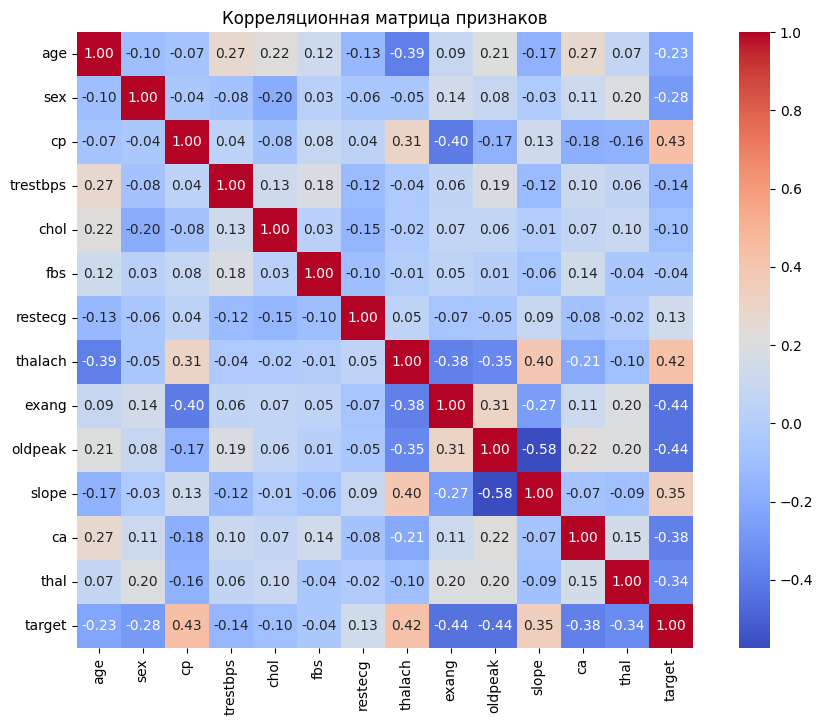

In [5]:
# Строим матрицу корреляции
correlation_matrix = df.corr()

# Визуализируем корреляционную матрицу
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Корреляционная матрица признаков")
plt.show()

##### Выводы:
1. Отсутствие пропущенных значений
    * Датасет не содержит пропущенных данных, что упрощает предварительную обработку и позволяет сразу приступить к построению моделей. Это особенно важно для алгоритмов, чувствительных к пропущенным данным, таких как логистическая регрессия или SVM.

2. Корреляция с целевой переменной (target)
    * На основе матрицы корреляции можно выделить несколько признаков, оказывающих значительное влияние на целевую переменную:
        * cp (тип боли в груди) положительно коррелирует с наличием заболевания.
        * thalach (максимальный пульс) также положительно коррелирует.
        * exang (стенокардия при нагрузке) — обратно коррелирует.
3. Независимость и мультиколлинеарность
    * Между многими признаками наблюдается слабая корреляция (менее ±0.2), что говорит о том, что они вносят уникальную информацию в модель и могут быть использованы совместно без риска мультиколлинеарности (например, age и thalach не скоррелированы). Это повышает устойчивость моделей, особенно линейных.
4. Признаки с низкой корреляцией с target
    * Некоторые признаки, например chol (холестерин) и restecg (ЭКГ в покое), имеют очень слабую связь с наличием заболевания. Это не обязательно делает их бесполезными — они могут быть информативны в сложных, нелинейных моделях, таких как деревья решений или градиентный бустинг, но, вероятно, будут исключены при построении простых линейных моделей.
5. Вывод о пригодности для ML
    * Набор данных обладает хорошим качеством: без пропусков, с умеренной размерностью и разнообразными типами признаков (категориальные и числовые).
    * Наличие признаков, коррелирующих с целевой переменной, позволяет ожидать приемлемую точность классификации.
    * Разумный баланс между признаками с высокой и низкой корреляцией создаёт потенциал для построения как интерпретируемых моделей (логистическая регрессия), так и более сложных, мощных моделей (случайный лес, XGBoost).

#### Диаграмма рассеивания

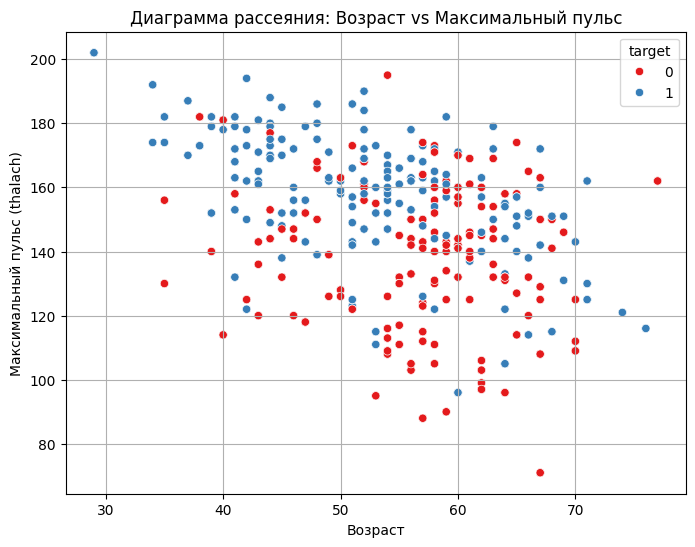

In [6]:
# Построим диаграмму рассеяния для пары признаков: age и thalach.
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='thalach', hue='target', palette='Set1')
plt.title('Диаграмма рассеяния: Возраст vs Максимальный пульс')
plt.xlabel('Возраст')
plt.ylabel('Максимальный пульс (thalach)')
plt.grid(True)
plt.show()

##### Вывод:
Можно наблюдать, что пациенты с более высоким максимальным пульсом чаще имеют положительный диагноз (target = 1).